In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt

# Set path for file
csvpath = os.path.join("loan.csv")
print(csvpath)

loan.csv


In [2]:
loans_df = pd.read_csv(csvpath)
loans_df.head()

C:\Users\Owner\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pertinent_loans_df = loans_df[[ "annual_inc", "loan_amnt", "term", "int_rate", "total_pymnt", "issue_d", "addr_state", "zip_code"]]
pertinent_loans_df

,annual_inc,loan_amnt,term,int_rate,total_pymnt,issue_d,addr_state,zip_code
0,55000.0,2500,36 months,13.56,167.020000,Dec-2018,NY,109xx
1,90000.0,30000,60 months,18.94,1507.110000,Dec-2018,LA,713xx
2,59280.0,5000,36 months,17.97,353.890000,Dec-2018,MI,490xx
3,92000.0,4000,36 months,18.94,286.710000,Dec-2018,WA,985xx
4,57250.0,30000,60 months,16.14,1423.210000,Dec-2018,MD,212xx
...,...,...,...,...,...,...,...,...
2260663,58000.0,12000,60 months,14.08,5360.960000,Oct-2017,VT,054xx
2260664,30000.0,12000,60 months,25.82,14499.802172,Oct-2017,OR,971xx
2260665,64000.0,10000,36 months,11.99,5306.940000,Oct-2017,IL,603xx
2260666,60000.0,12000,60 months,21.45,5207.290000,Oct-2017,AK,996xx


In [4]:
pertinent_loans_df["annual_inc"].max()

110000000.0

In [5]:
# Create the bins in which annual_inc will be held, based on tax brackets
bins = [0, 9700, 39475, 84200, 160725, 204100, 510300, 110000000]


# Create the names for the four bins
income_tiers = ["Tier_One", "Tier_Two", "Tier_Three", "Tier_Four", "Tier_Five", "Tier_Six", "Tier_Seven"]

In [6]:
a = pd.cut(pertinent_loans_df["annual_inc"], bins, labels=income_tiers)
a.head()

0    Tier_Three
1     Tier_Four
2    Tier_Three
3     Tier_Four
4    Tier_Three
Name: annual_inc, dtype: category
Categories (7, object): [Tier_One < Tier_Two < Tier_Three < Tier_Four < Tier_Five < Tier_Six < Tier_Seven]

In [7]:
pertinent_loans_df["tier_group"] = a
pertinent_loans_df.head()

C:\Users\Owner\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,annual_inc,loan_amnt,term,int_rate,total_pymnt,issue_d,addr_state,zip_code,tier_group
0,55000.0,2500,36 months,13.56,167.02,Dec-2018,NY,109xx,Tier_Three
1,90000.0,30000,60 months,18.94,1507.11,Dec-2018,LA,713xx,Tier_Four
2,59280.0,5000,36 months,17.97,353.89,Dec-2018,MI,490xx,Tier_Three
3,92000.0,4000,36 months,18.94,286.71,Dec-2018,WA,985xx,Tier_Four
4,57250.0,30000,60 months,16.14,1423.21,Dec-2018,MD,212xx,Tier_Three


In [8]:
# Create a GroupBy object based upon "View Group"
loan_group = pertinent_loans_df.groupby("tier_group")

# Find how many rows fall into each bin
print(loan_group["annual_inc"].count())

# Get the average of each column within the GroupBy object
loan_group[["int_rate", "loan_amnt", "annual_inc"]].mean()

tier_group
Tier_One         2954
Tier_Two       343095
Tier_Three    1196274
Tier_Four      604591
Tier_Five       59806
Tier_Six        48894
Tier_Seven       3383
Name: annual_inc, dtype: int64


,int_rate,loan_amnt,annual_inc
tier_group,,,
Tier_One,14.813074,11096.267773,6.529720e+03
Tier_Two,13.962959,8677.464842,2.989422e+04
Tier_Three,13.252005,13711.771613,5.970080e+04
Tier_Four,12.506046,19535.365230,1.101832e+05
Tier_Five,11.945691,23553.136809,1.814288e+05
Tier_Six,11.709249,25823.841371,2.769104e+05
Tier_Seven,11.682722,26295.876441,1.068499e+06


100 loans from each tier 

In [ ]:
##df.iloc[np.random.randint(1,1000), :]

# Interest Rate Bar Graph

In [9]:
# state average loan size
state_loan_mean = pertinent_loans_df.groupby(['addr_state'])['loan_amnt'].mean()
state_loan_mean_df = pd.DataFrame(state_loan_mean)

# Created new column "state_name" to make index for graph
state_loan_mean_df["state_name"] = state_loan_mean_df.index
state_loan_mean_df

,loan_amnt,state_name
addr_state,,
AK,17285.394762,AK
AL,14686.235523,AL
AR,14094.558979,AR
AZ,14522.307399,AZ
CA,15287.680784,CA
CO,15103.339871,CO
CT,15301.298030,CT
DC,15815.393951,DC
DE,14935.115361,DE


In [10]:
import numpy as np

# Set x axis and tick locations
x_axis = np.arange(len(state_loan_mean_df))
tick_locations = [value+0.4 for value in x_axis]

Text(0, 0.5, 'Average Loan Amount')

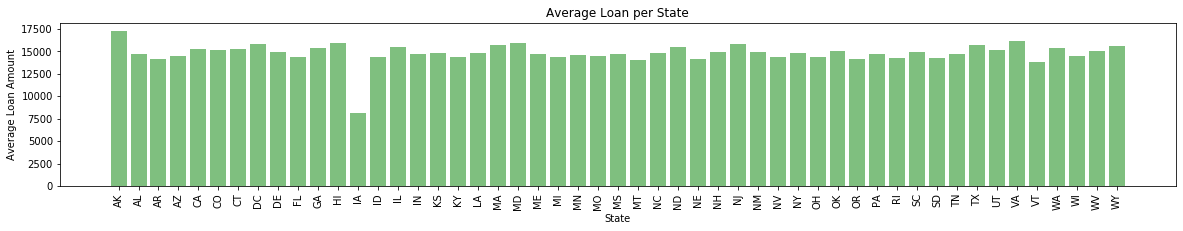

In [11]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, state_loan_mean_df["loan_amnt"], color='g', alpha=0.5, align="edge")
plt.xticks(tick_locations, state_loan_mean_df["state_name"], rotation="vertical")

# Set a Title and labels
plt.title("Average Loan per State")
plt.xlabel("State")
plt.ylabel("Average Loan Amount")

# Average Interest Rate per State 

In [12]:
# state avg int rate
state_int_rate_mean = pertinent_loans_df.groupby(['addr_state'])['int_rate'].mean()
state_int_rate_mean_df = pd.DataFrame(state_int_rate_mean)

# Created new column "state_name" to make index for graph
state_int_rate_mean_df["state_name"] = state_int_rate_mean_df.index
state_int_rate_mean_df

,int_rate,state_name
addr_state,,
AK,13.328014,AK
AL,13.567485,AL
AR,13.354703,AR
AZ,12.963267,AZ
CA,12.976628,CA
CO,12.888202,CO
CT,13.050412,CT
DC,12.578114,DC
DE,13.196358,DE


In [13]:
# Set x axis and tick locations
x_axis = np.arange(len(state_loan_mean_df))
tick_locations = [value+0.4 for value in x_axis]

# Bar Graph FAIL!!! Doesn't represent data very well.

Text(0, 0.5, 'Average Interest Rate')

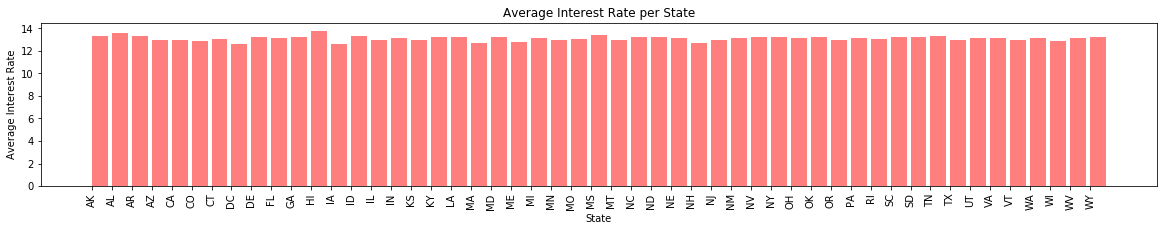

In [24]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, state_int_rate_mean_df["int_rate"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, state_int_rate_mean_df["state_name"], rotation="vertical")

# Set a Title and labels
plt.title("Average Interest Rate per State")
plt.xlabel("State")
plt.ylabel("Average Interest Rate")

# Line Graph shows Avg. Interest Rate data much better.

In [18]:
interest_rate = []

In [19]:
state_names = []

In [20]:
# state avg int rate
state_int_rate_mean = pertinent_loans_df.groupby(['addr_state'])['int_rate'].mean()
state_int_rate_mean_df = pd.DataFrame(state_int_rate_mean)

# Created new column "state_name" to make index for graph
state_int_rate_mean_df["state_name"] = state_int_rate_mean_df.index
list(state_int_rate_mean_df["int_rate"]) 

[13.32801376409857,
 13.567485339391439,
 13.354703057279277,
 12.963267010058688,
 12.976628143969622,
 12.888201647882491,
 13.050411904427765,
 12.578114264376381,
 13.19635800557455,
 13.164815329246071,
 13.208650331552356,
 13.786781964754796,
 12.631428571428572,
 13.295013927576408,
 12.960123611155202,
 13.18094415566934,
 12.995099691244064,
 13.18652579156478,
 13.225104623625642,
 12.676826819093227,
 13.236113909049124,
 12.817557297949124,
 13.164594010548047,
 12.970615431331835,
 13.049272253628907,
 13.445813751088009,
 12.956177170979696,
 13.18915622508989,
 13.245795043163465,
 13.179450057552476,
 12.699506372285402,
 12.99011211085835,
 13.15597530452203,
 13.205397005234746,
 13.26004973470032,
 13.137271601978549,
 13.263297085688448,
 12.954879614766018,
 13.14588856106584,
 13.033194402799108,
 13.267086740704643,
 13.21509342712674,
 13.287529521177493,
 12.999443797465382,
 13.098307210031066,
 13.113714458174092,
 12.986204172574324,
 13.15742966425681,
 12

In [21]:
for index, row in state_int_rate_mean_df .iterrows():
# list(state_int_rate_mean_df["int_rate"]) 
    interest= row["int_rate"]
    interest_rate.append(interest)

In [22]:
for index, row in state_int_rate_mean_df .iterrows():
# list(state_int_rate_mean_df["state_name"]) 
    interest= row["state_name"]
    state_names.append(interest)

<function matplotlib.pyplot.show(*args, **kw)>

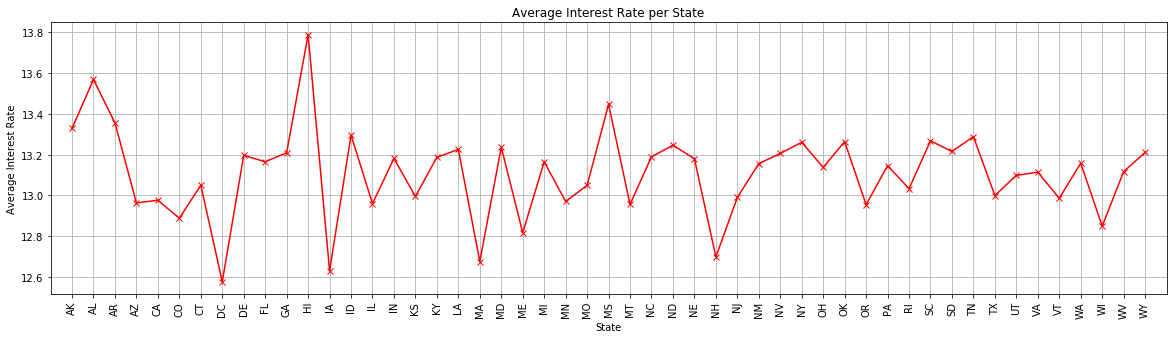

In [23]:
plt.figure(figsize=(20,5))
plt.plot(interest_rate, marker="x", color="red", label="Interest Rate")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, state_int_rate_mean_df["state_name"], rotation="vertical")

plt.title("Average Interest Rate per State")
plt.xlabel("State")
plt.ylabel("Average Interest Rate")

# Set the limits for the X and Y axes
plt.xlim(-1,51)
# plt.ylim(5,95)
plt.grid()
plt.show